Found 220 images belonging to 5 classes.
Found 120 images belonging to 5 classes.
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


6/6 ━━━━━━━━━━━━━━━━━━━━ 246s 36s/step - accuracy: 0.2257 - loss: 7.4284 - val_accuracy: 0.2604 - val_loss: 5.0433
Epoch 2/5
1/6 ━━━━━━━━━━━━━━━━━━━━ 1:38 20s/step - accuracy: 0.1875 - loss: 7.8759

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


6/6 ━━━━━━━━━━━━━━━━━━━━ 35s 3s/step - accuracy: 0.1875 - loss: 7.8759 - val_accuracy: 0.3333 - val_loss: 2.8115
Epoch 3/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 237s 34s/step - accuracy: 0.6483 - loss: 2.5006 - val_accuracy: 0.5417 - val_loss: 2.3605
Epoch 4/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 75s 11s/step - accuracy: 0.5625 - loss: 2.6865 - val_accuracy: 0.6667 - val_loss: 2.0452
Epoch 5/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 189s 33s/step - accuracy: 0.6830 - loss: 2.1391 - val_accuracy: 0.7917 - val_loss: 0.9499
4/4 ━━━━━━━━━━━━━━━━━━━━ 76s 18s/step - accuracy: 0.7548 - loss: 0.8948
Validation Loss: 0.9554932713508606
Validation Accuracy: 0.7749999761581421
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 710ms/step
Predicted Yoga Pose: Image of  horse


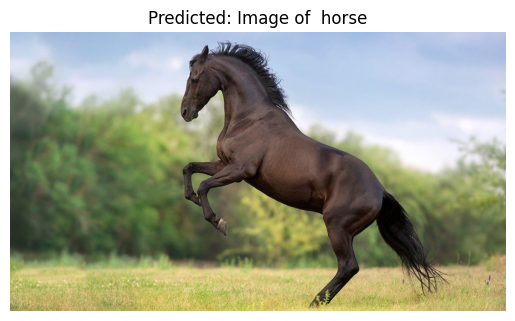

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True


train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)



test_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
    '/content/drive/My Drive/Animal/Train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')


validation_generator = test_datagen.flow_from_directory(
    '/content/drive/My Drive/Animal/Test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

# Load the VGG16 model without the top classification layer
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top of the base model
x = base_model.output
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)  # Number of classes based on folders

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=6,
    validation_data=validation_generator,
    validation_steps=3,
    epochs=5)

# Evaluate the model
loss, accuracy = model.evaluate(validation_generator)
print(f"Validation Loss: {loss}")
print(f"Validation Accuracy: {accuracy}")

# Function to load and preprocess an image
def load_and_preprocess_image(img_path):
    img = load_img(img_path, target_size=(224, 224))  # Resize to match the input shape of the model
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Normalize pixel values to [0, 1]
    return img_array

# Function to predict the yoga pose
def predict_yoga_pose(img_path, model):
    img_array = load_and_preprocess_image(img_path)
    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions, axis=1)[0]  # Get index of the highest probability class

    # Map class indices to class names
    class_labels = list(train_generator.class_indices.keys())  # Get class labels from the training generator
    predicted_class_label = class_labels[predicted_class_index]

    # Print and display the result
    print(f"Predicted Yoga Pose: {predicted_class_label}")

    # Display the image
    img = load_img(img_path)
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_class_label}")
    plt.axis('off')
    plt.show()

# Path to the new image for prediction
img_path = '/content/drive/My Drive/Animal/1.jpg'  # Replace with the path to your image

# Predict the yoga pose
predict_yoga_pose(img_path, model)

model_save_path = '/content/drive/My Drive/Animal/animal.h5'
model.save(model_save_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted Animal is: Image of  butterfly


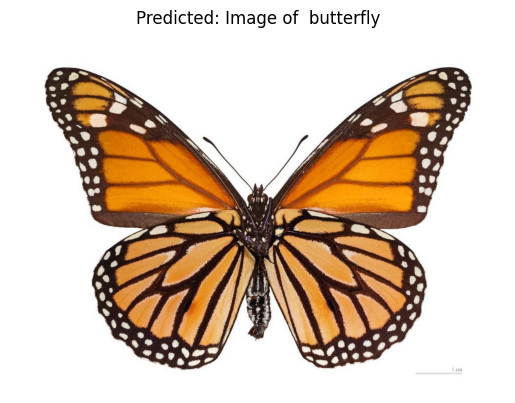

In [1]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

model = load_model('/content/drive/My Drive/Animal/animal.h5')

# Load and preprocess the image
img_path = '/content/drive/My Drive/Animal/5.jpg'
img = image.load_img(img_path, target_size=(224, 224))  # Load image with the target size
img_array = image.img_to_array(img)  # Convert to numpy array
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array = img_array / 255.0  # Normalize pixel values

# Use the model's predict function
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions, axis=1)[0]  # Get index of the highest probability class

    # Map class indices to class names
class_labels = ['Image of  butterfly', 'Image of  horse', 'Image of  lion', 'Image of cow', 'Image of elephant ']

 # Get class labels from the training generator
predicted_class_label = class_labels[predicted_class_index]

    # Print and display the result
print(f"Predicted Animal is: {predicted_class_label}")

    # Display the image
img = load_img(img_path)
plt.imshow(img)
plt.title(f"Predicted: {predicted_class_label}")
plt.axis('off')
plt.show()